## Pré requisitos
 Para o processos de treinamento de modelos que utilizam redes convulcionais é necessario um grande uso de processamento, assim para garantir que será executado sem erros ativa se a GPU através do comando !nvidia -smi


In [1]:
!nvidia-smi

Mon May 29 04:34:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Para a verificação dos processos durante a construção do treinamento do modelo iremos utilizar a biblioteca os que permite cria diretórios e acessar arquivos neles contidos.



In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


Instalação da biblioteca ultralytics para utilizar o modelo de treinamento Yolo V8.

In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 14.5 MB/s eta 0:00:00


## Importação do YOLO e bibliotecas auxiliares


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Treinando o modelo
Para treinar o modelo iremos criar um repositório no qual será armazenado o nosso dataset que será carregado através da biblioteca roboflow que possui imagens para o treinamento do modelo.


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3W9OcCji9eCtFMKy5dfm")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d8fa38319e89dce80f81aa67e30152e5dda5d972876859b119e291376dad1105
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:02<00:00, 3564.61it/s]


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/crack-2/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 75.7MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/crack-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685335008.9838ea440e2f.1341.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


Plotando alguns resultados sobre o modelo

/content


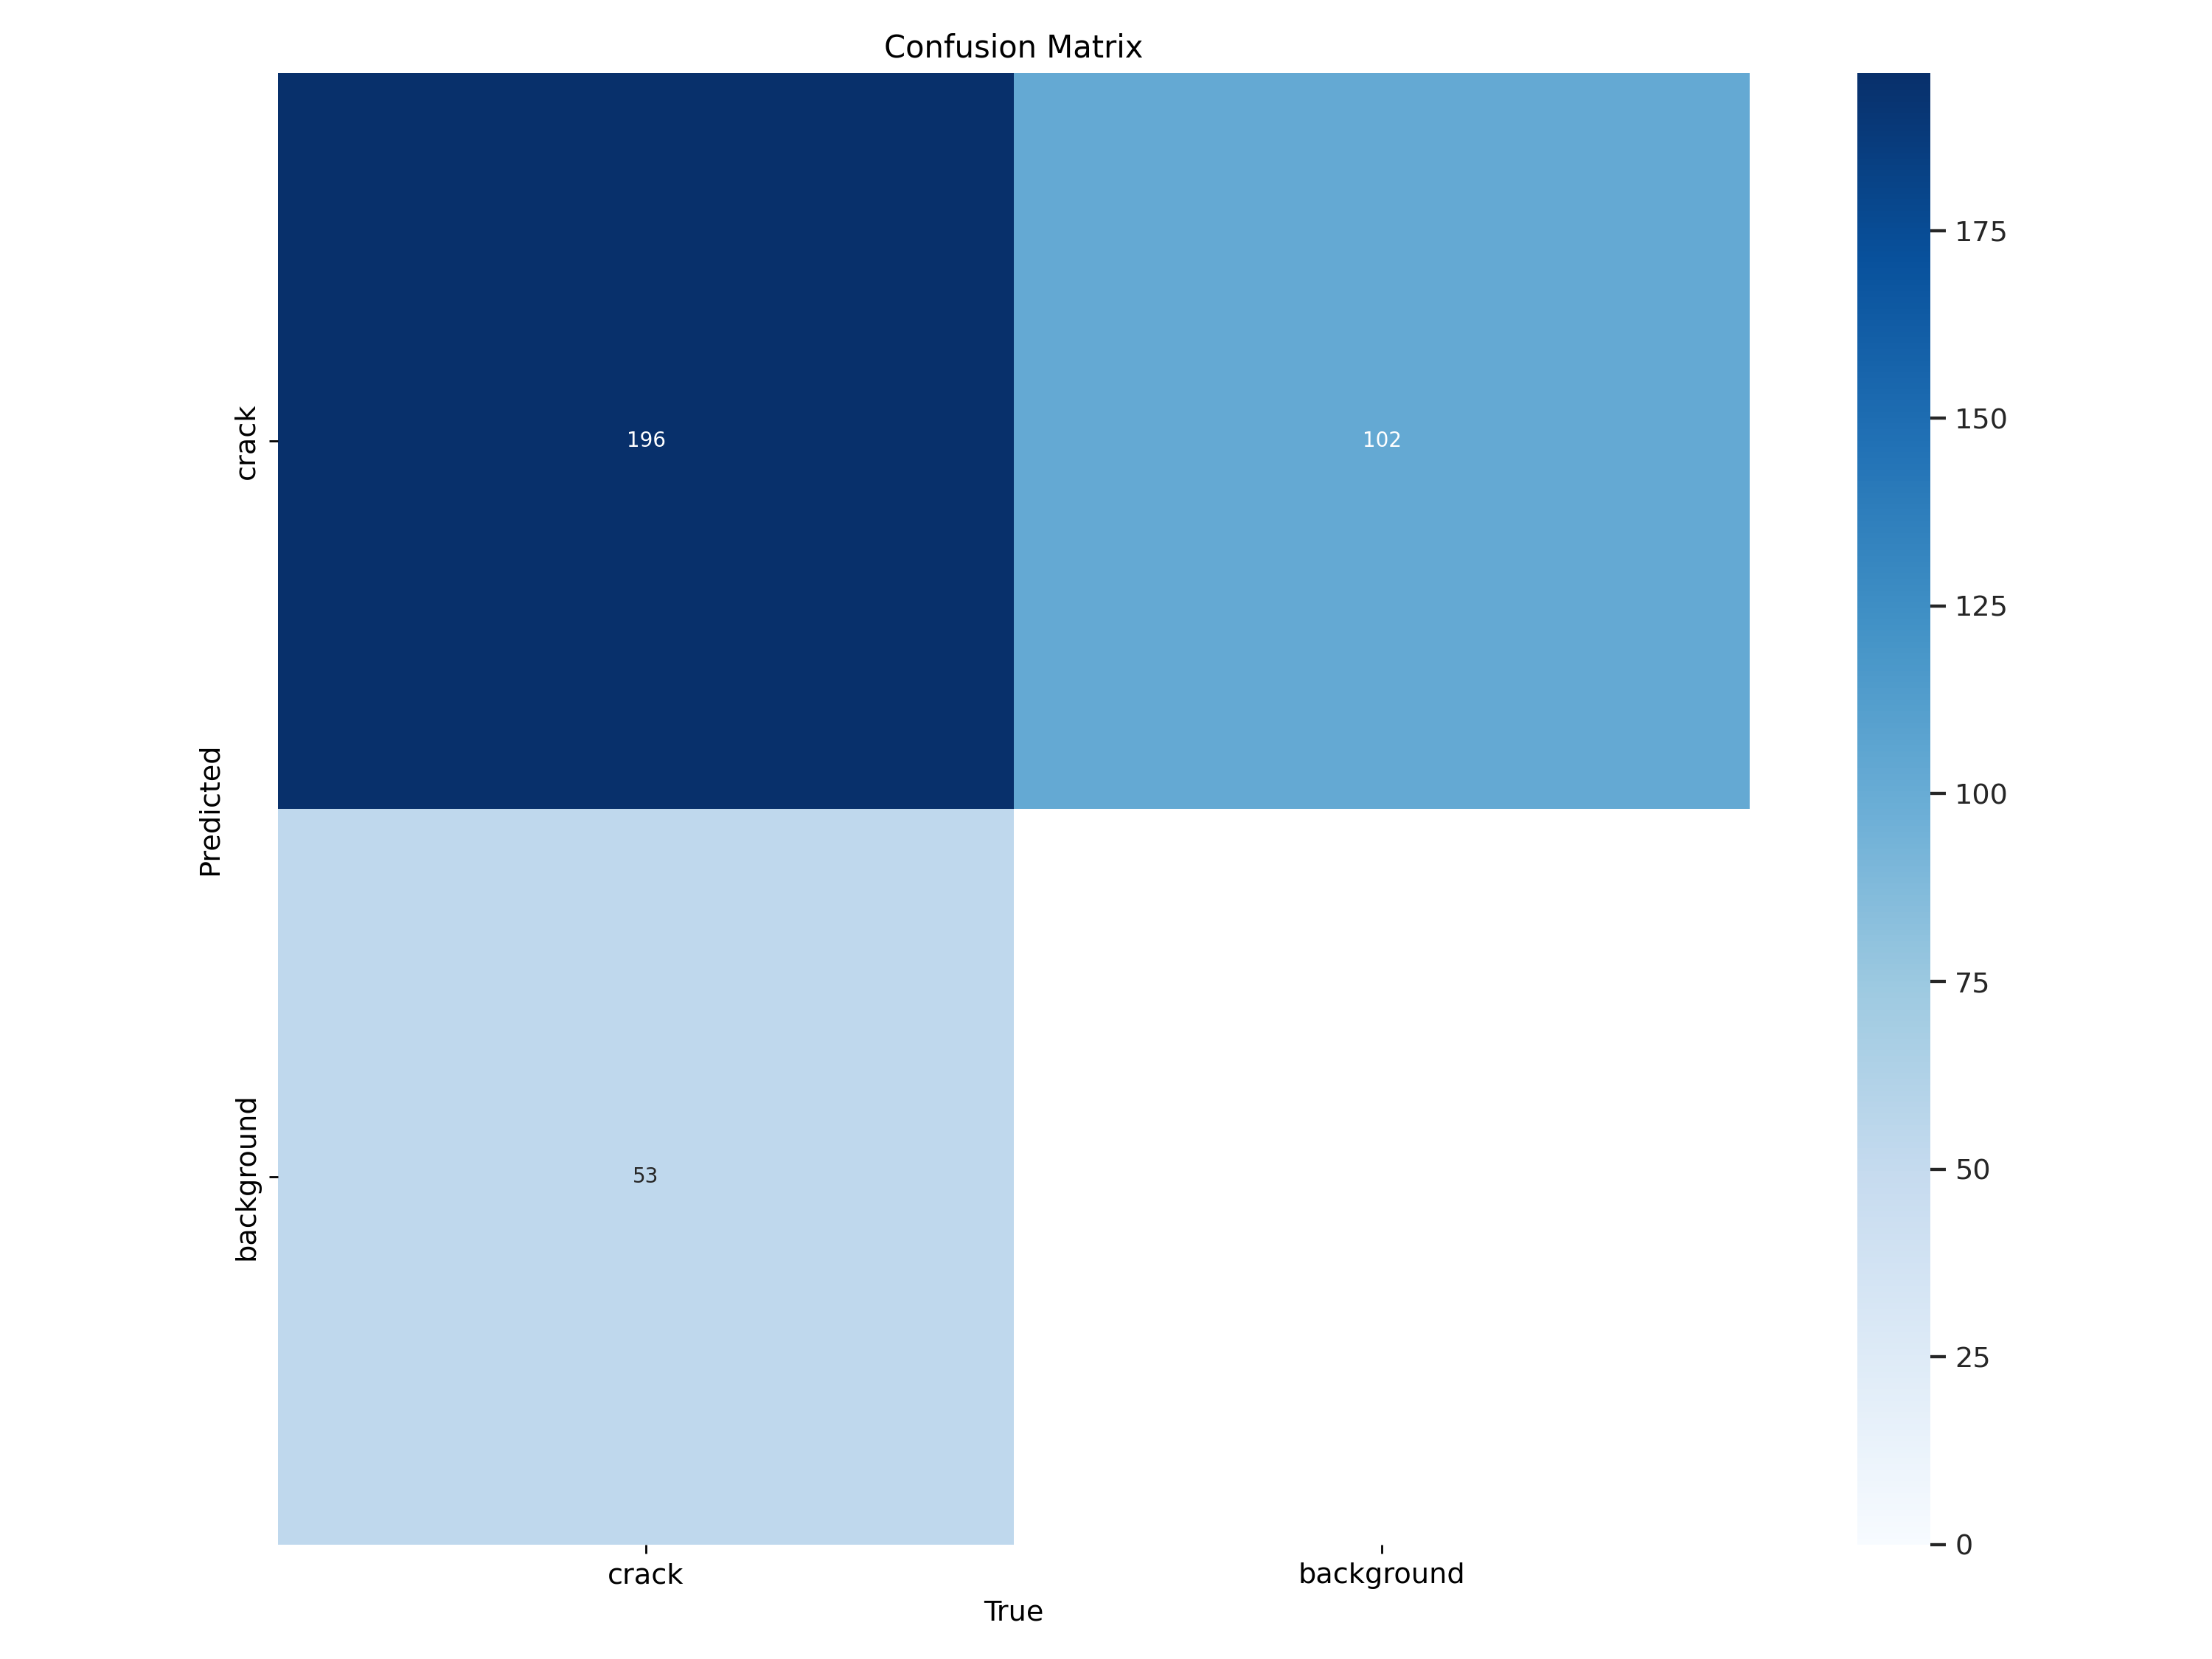

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Visualizando imagens da base de treino do modelo

/content


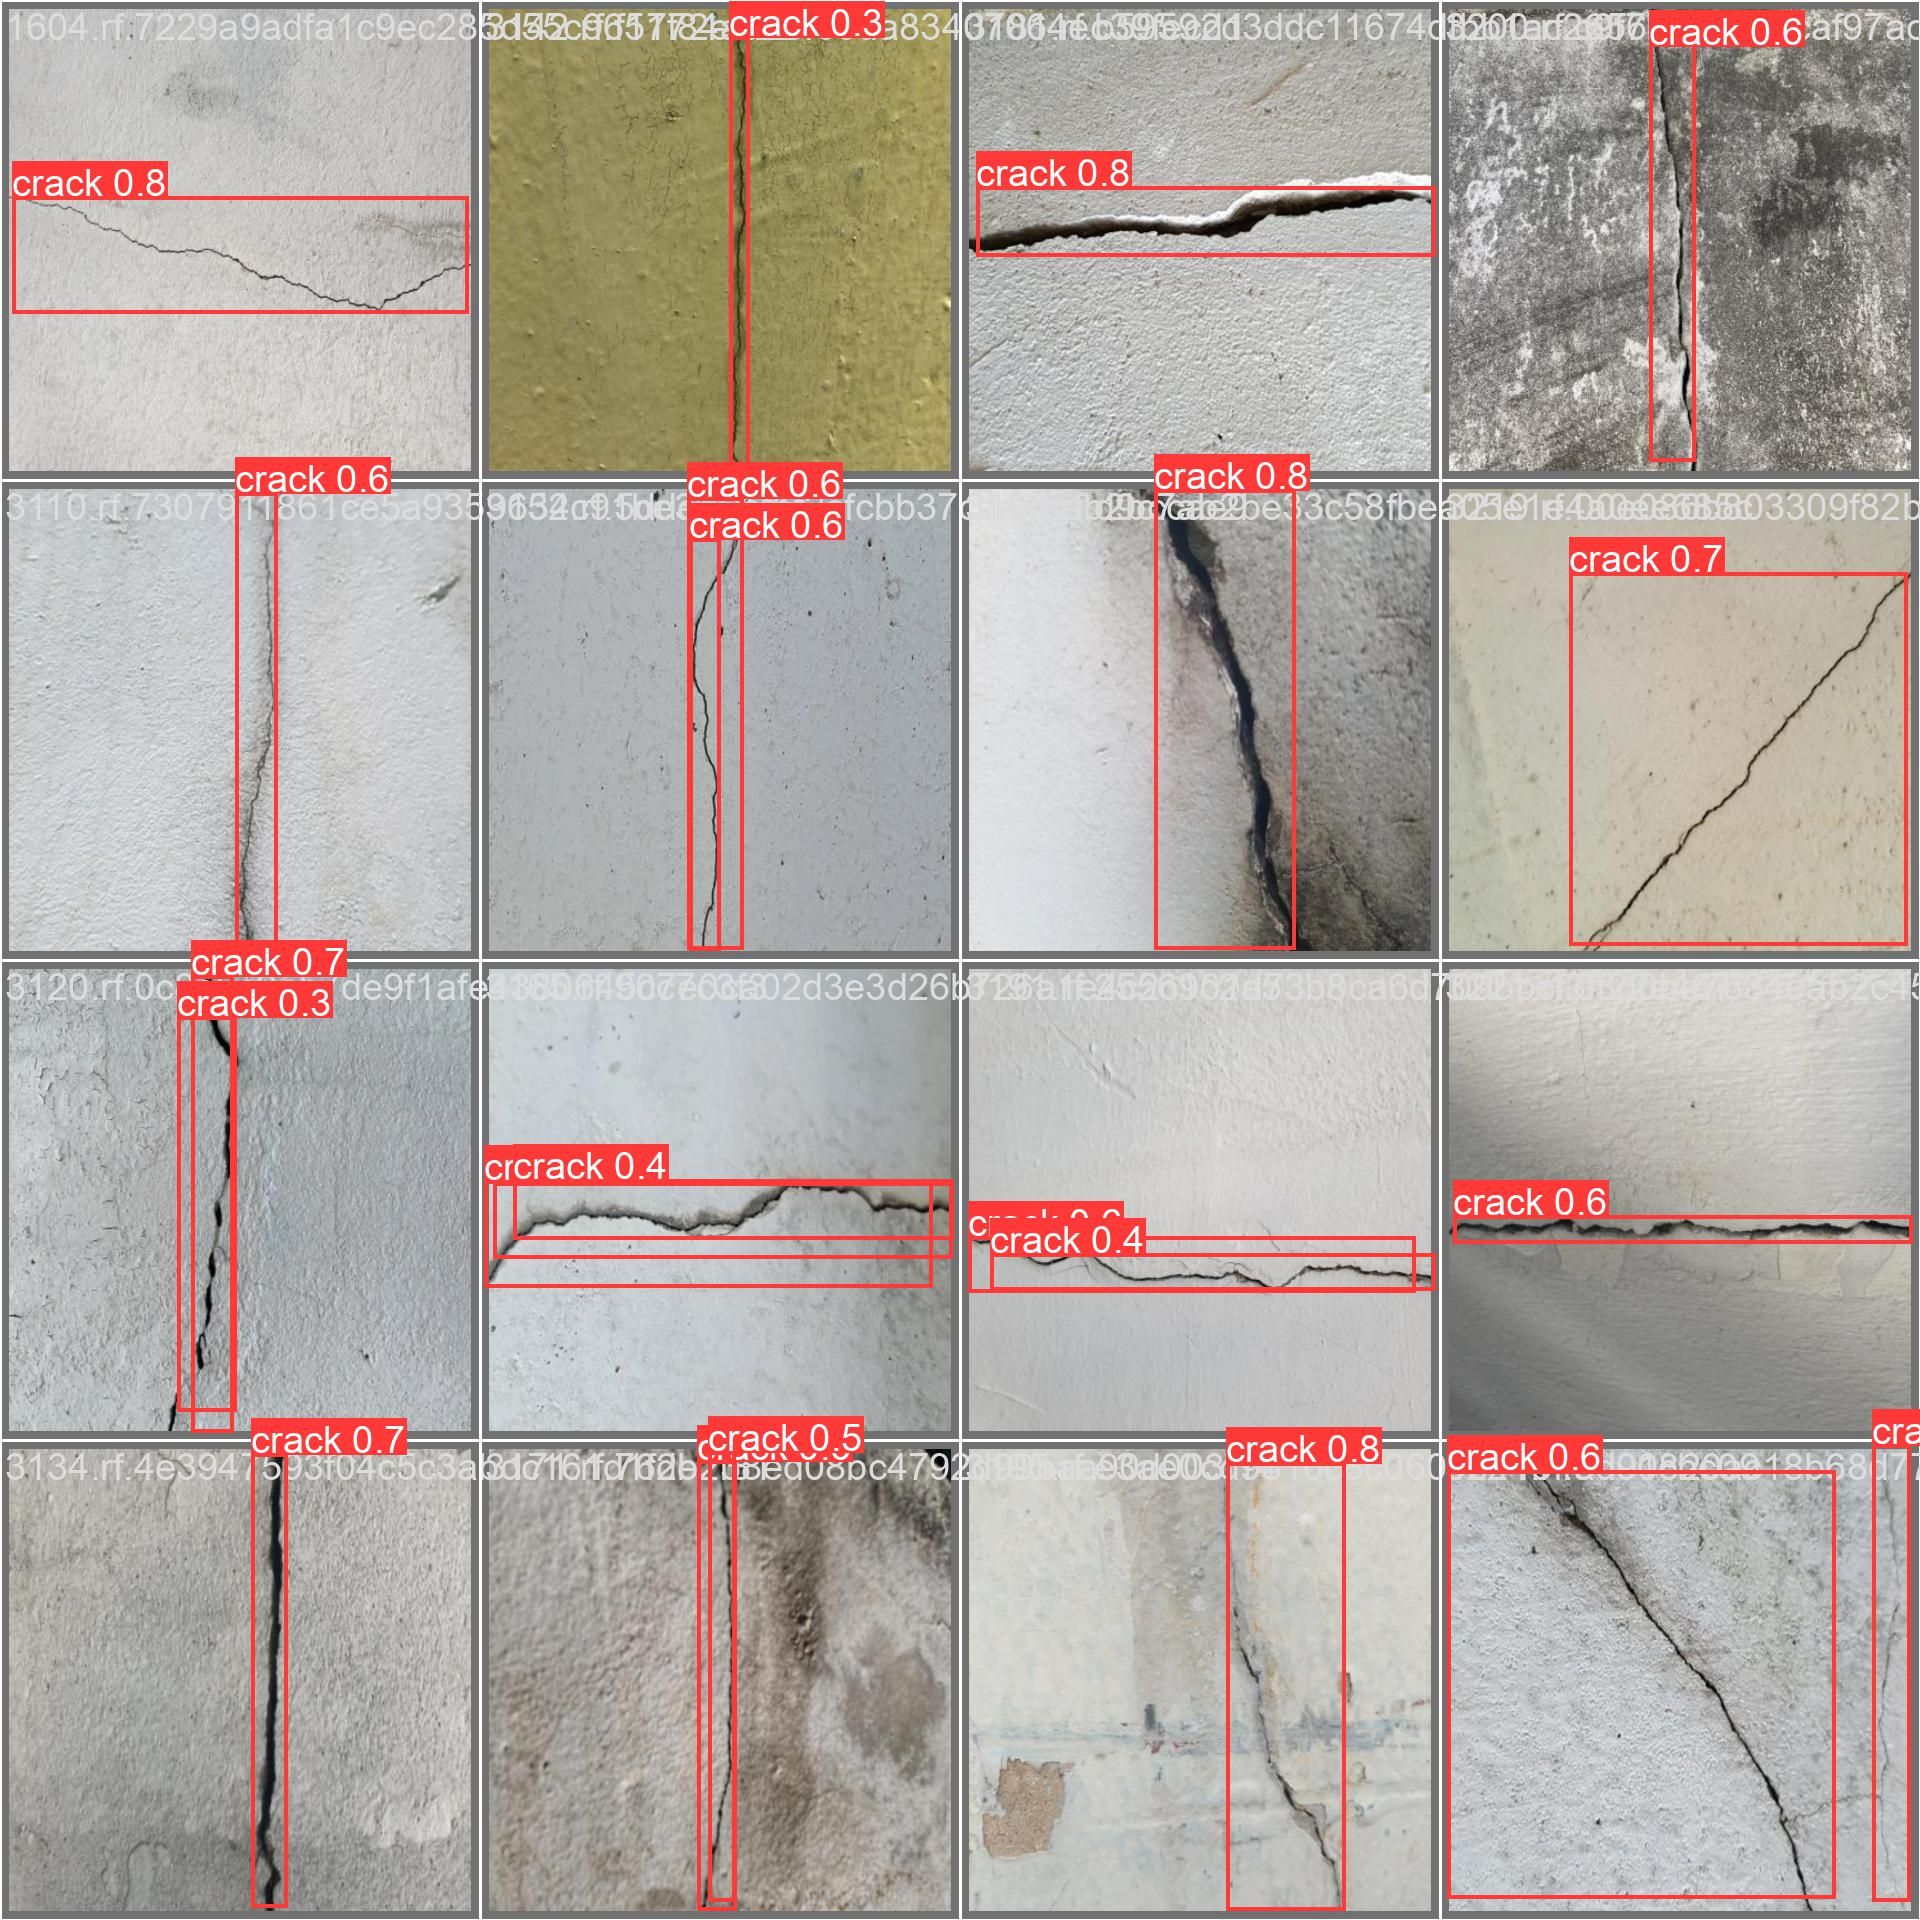

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/crack-2/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:06<00:00,  2.05it/s]
                   all        200        249      0.805      0.697      0.768       0.51
Speed: 4.2ms preprocess, 13.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/112 /content/datasets/crack-2/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 800x800 2 cracks, 24.6ms
image 2/112 /content/datasets/crack-2/test/images/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 800x800 3 cracks, 24.7ms
image 3/112 /content/datasets/crack-2/test/images/1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg: 800x800 1 crack, 24.6ms
image 4/112 /content/datasets/crack-2/test/images/1706.rf.011d213c21ec78896c36728dcbc156f5.jpg: 800x800 (no detections), 24.0ms
image 5/112 /content/datasets/crack-2/test/images/1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg: 800x800 2 cracks, 21.9ms
image 6/112 /content/datasets/crack-2/test/images/1722.rf.38b38f2e833309a4f35bfbf0432dffff.jpg: 800x800 2 cracks, 21.8ms
image 7/112 /content/datasets/crack-2/test/images/1794.rf.7a03ca09d05e9e2941f768bc8570cb54.jpg: 800x80

Testando o modelo com uma imagem aleatória.

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 398, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 250, in predict
    self.predictor.setup_model(model=self.model, verbose=is_cli)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/predictor.py", line 295, in setup_model
    self.model = AutoBackend(model,
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/autobackend.py", line 93, in __init__
    model = weights.to(device)
  File "/usr/local/lib/python3.10/dist-

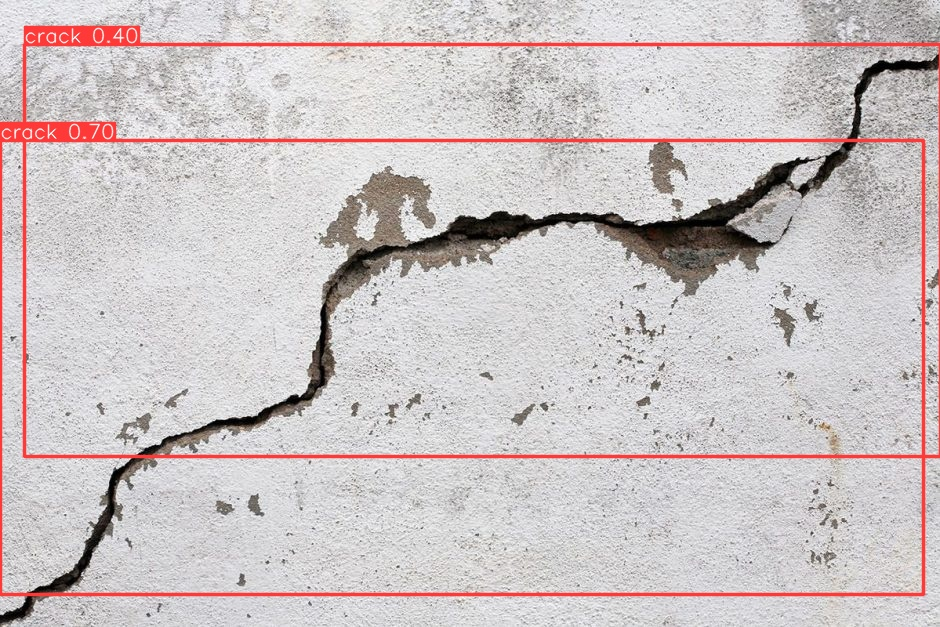

In [18]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/RACHADURA-NA-PAREDE-POR-QUE-OCORRE-E-COMO-SOLUCIONAR.jpg save=True
display(Image(filename="/content/runs/detect/predict4/RACHADURA-NA-PAREDE-POR-QUE-OCORRE-E-COMO-SOLUCIONAR.jpg", width=600))
print("\n")